In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
from textwrap import wrap

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Chisquare Distribution simulation

### a) Sum of squares of normal random variables

In [4]:
def generate_chisq(n,num=1000):
    X = np.array([np.sum(np.random.randn(n)**2) for i in range(num)])
    return X

In [5]:
def pdf(vector,bins=30):
    vector = np.array(vector)
    min_value = np.min(vector)
    max_value = np.max(vector)
    bin_length = (max_value-min_value)/bins
    
    bin_range = np.array([min_value+bin_length*i for i in range(bins+1)])
    mid_points = bin_range-bin_length/2
    prob = [len(vector[(vector<bin_range[i])&(vector>=bin_range[i-1])])/len(vector) for i in range(1,len(bin_range))]
    density = prob/bin_length
    
    df = pd.DataFrame({"Bin_range":bin_range[1:],"Mid Point":mid_points[1:],"Prob":prob,"Density":density})
    return df

In [6]:
def plot_chisq(n,ax=None,num=1000,bins=30):
    if ax == None:
        ax = plt.gca()
    X = generate_chisq(n,num)
    pdf_chisq_calc = pdf(X)
    ax.plot(pdf_chisq_calc["Mid Point"],pdf_chisq_calc["Density"],color ="blue")
    ax.plot(pdf_chisq_calc["Mid Point"],st.chi2.pdf(pdf_chisq_calc["Mid Point"],n),color = "black",ls="--")
    ax.legend(["Calculated","Parametric"])
    #plt.close()
    return ax

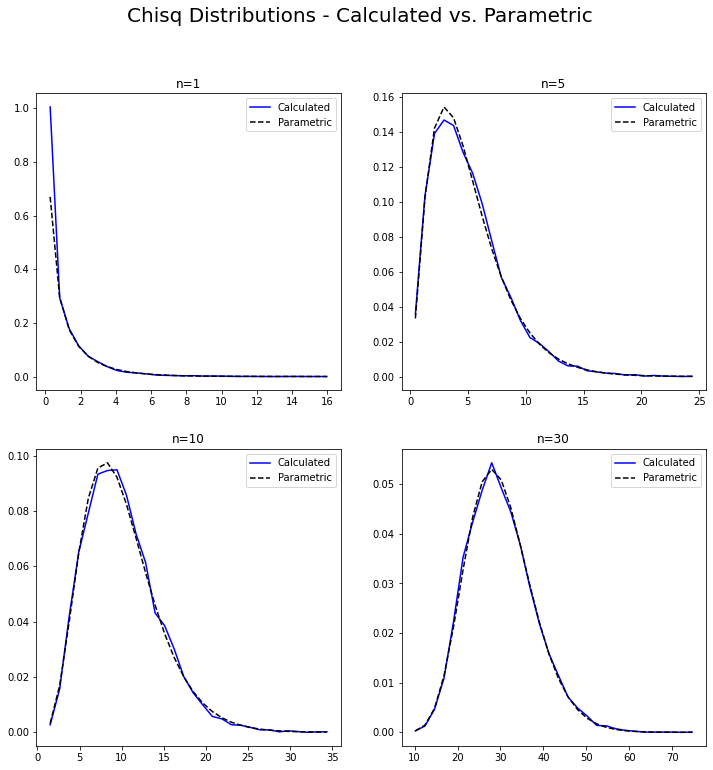

In [7]:
n = [1,5,10,30]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i in range(2):
    for j in range(2):
        plot_chisq(n[i*2+j],ax= ax[i][j],num=10000)
        ax[i][j].set_title(f"n={n[i*2+j]}")
plt.suptitle("Chisq Distributions - Calculated vs. Parametric",fontsize =20)
plt.show()

### b) Sample Variance (normalized) of samples from a normal distribution is chisquared with n-1 degrees of freedom

In [8]:
def generate_normal_rv(n,mean=0,variance=1):
    return np.random.randn(n)*variance**0.5+mean

In [9]:
def compute_sample_variance(vector):
    sample_mean = np.mean(vector)
    sample_variance = np.sum((vector-sample_mean)**2)/(len(vector)-1)
    return sample_variance

In [10]:
def plot_sample_variance_dist(n,ax=None,num=1000,bins=30,mean=0,var =1):
    if ax == None:
        ax = plt.gca()
    sample_vars = np.array([compute_sample_variance(generate_normal_rv(n,mean,var)) for i in range(num)])
    X = sample_vars/var*(n-1)
    pdf_chisq_calc = pdf(X)
    ax.plot(pdf_chisq_calc["Mid Point"],pdf_chisq_calc["Density"],color ="blue")
    ax.plot(pdf_chisq_calc["Mid Point"],st.chi2.pdf(pdf_chisq_calc["Mid Point"],n),color = "black",ls=":")
    ax.plot(pdf_chisq_calc["Mid Point"],st.chi2.pdf(pdf_chisq_calc["Mid Point"],n-1),color = "black",ls="--")
    ax.legend(["Calculated","Parametric (df = n)","Parametric (df = n-1)"])
    #plt.close()
    return ax

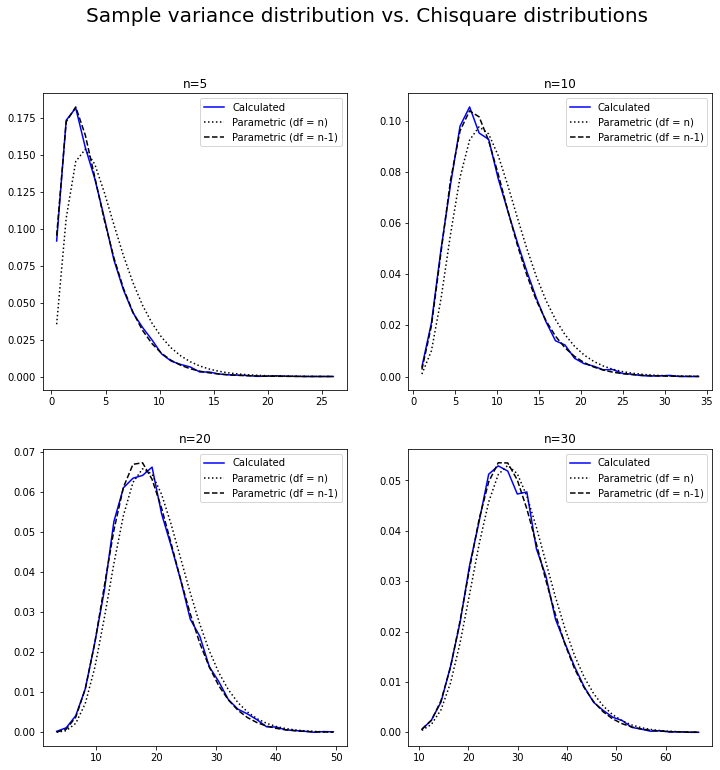

In [11]:
n = [5,10,20,30]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i in range(2):
    for j in range(2):
        plot_sample_variance_dist(n[i*2+j],ax= ax[i][j],num=10000,mean=50,var=250)
        ax[i][j].set_title(f"n={n[i*2+j]}")
plt.suptitle("Sample variance distribution vs. Chisquare distributions",fontsize =20)
plt.show()

# T Distribution Simulation

### a) T Distribution from normal and chisquare distributions`

In [12]:
def generate_T_rv(n,num=1000):
    Z = generate_normal_rv(num)
    X_2 = generate_chisq(n,num)
    return Z/(X_2/n)**0.5

In [13]:
def plot_T_dist(n,ax=None,num=1000,bins=30):
    if ax == None:
        ax = plt.gca()
    X = generate_T_rv(n,num)
    pdf_T_calc = pdf(X)
    ax.plot(pdf_T_calc["Mid Point"],pdf_T_calc["Density"],color ="blue")
    ax.plot(pdf_T_calc["Mid Point"],st.t.pdf(pdf_T_calc["Mid Point"],n),color = "black",ls="--")
    ax.plot(pdf_T_calc["Mid Point"],st.norm.pdf(pdf_T_calc["Mid Point"]),color = "black",ls=":")
    ax.legend(["Calculated","T","Normal"])
    #plt.close()
    return ax

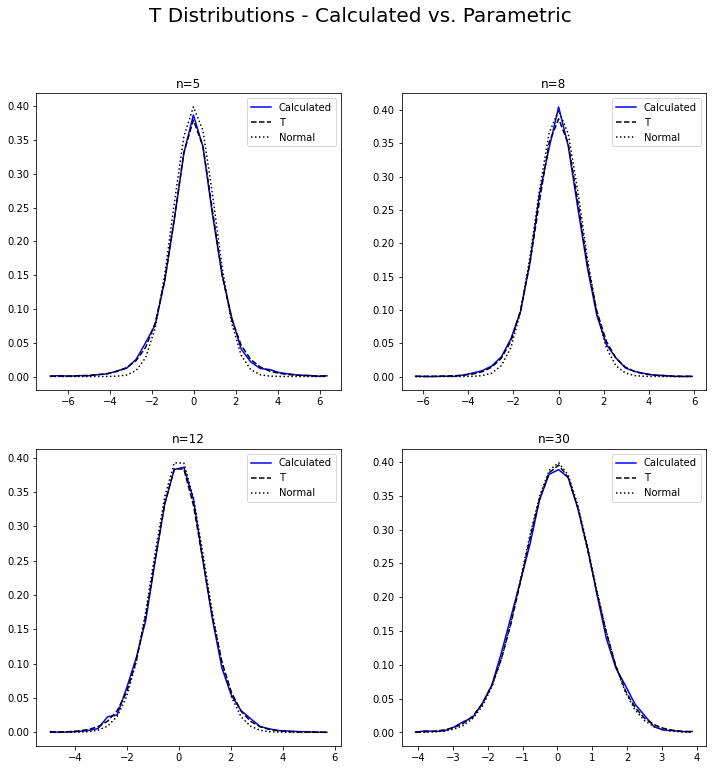

In [14]:
n = [5,8,12,30]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i in range(2):
    for j in range(2):
        plot_T_dist(n[i*2+j],ax= ax[i][j],num=10000)
        ax[i][j].set_title(f"n={n[i*2+j]}")
plt.suptitle("T Distributions - Calculated vs. Parametric",fontsize =20)
plt.show()

### b) Sample mean inference when population variance is unknown

Sample mean $\bar{x}$ is normally distributed with mean $\mu$ and variance $\frac{\sigma^2}{n}$. Hence $\frac{\bar{x}-\mu}{\sqrt{\frac{\sigma^2}{n}}}$ is from a standard normal distribution.

If $\sigma^2$ is not known, $s^2$ can be used. But the quantity $\frac{\bar{x}-\mu}{\sqrt{\frac{s^2}{n}}}$ is t-distributed with n-1 degrees of freedom. The population can be any distribution.

In [15]:
def generate_exp_rv(n=1000,l=1):
    U = np.random.rand(n)
    X = -np.log(1-U)/l
    return X

In [16]:
def t_stat_calc(vector,pop_mean):
    x_bar = np.mean(vector)
    s_var = np.sum((vector-x_bar)**2)/(len(vector)-1)
    t_stat = (x_bar-pop_mean)*np.sqrt(len(vector)/s_var)
    return t_stat

In [17]:
def plot_t_stat_dist(n,ax=None,num=1000,bins=30,l=5,pop_mean=1/5):
    if ax == None:
        ax = plt.gca()
    X = np.array([t_stat_calc(generate_exp_rv(n,l),pop_mean) for i in range(num)])
    pdf_T_calc = pdf(X)
    ax.plot(pdf_T_calc["Mid Point"],pdf_T_calc["Density"],color ="blue")
    ax.plot(pdf_T_calc["Mid Point"],st.t.pdf(pdf_T_calc["Mid Point"],df = n-1),color = "black",ls="--",alpha=0.5)
    ax.plot(pdf_T_calc["Mid Point"],st.norm.pdf(pdf_T_calc["Mid Point"]),color = "black",ls=":")
    ax.legend(["Calculated","T (df = n-1)","Normal"])
    #plt.close()
    return ax

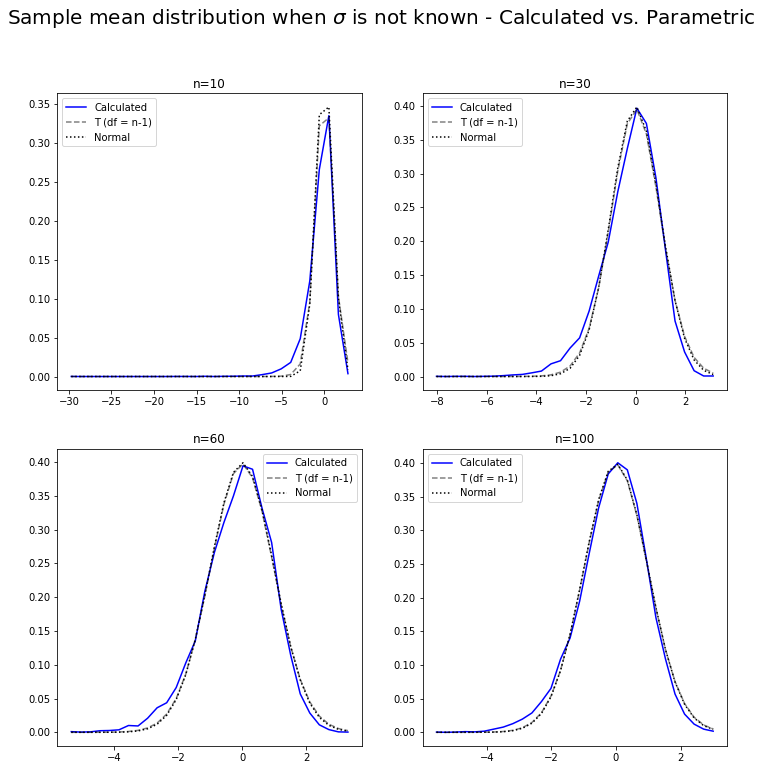

In [18]:
n = [10,30,60,100]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i in range(2):
    for j in range(2):
        plot_t_stat_dist(n[i*2+j],ax= ax[i][j],num=10000)
        ax[i][j].set_title(f"n={n[i*2+j]}")
plt.suptitle("Sample mean distribution when $\sigma$ is not known - Calculated vs. Parametric",fontsize =20)
plt.show()

# F Distribution Simulation

### a) Ratio of Chisquare variables divided by sample size

In [19]:
def generate_F_rv(n1,n2,num=1000):
    s1 = generate_chisq(n1,num)
    s2 = generate_chisq(n2,num)
    f1 = s1/n1
    f2 = s2/n2
    return f1/f2

In [20]:
def plot_F_dist(n1,n2,ax=None,num=1000,bins=30):
    if ax == None:
        ax = plt.gca()
    X = generate_F_rv(n1,n2,num)
    pdf_chisq_calc = pdf(X)
    ax.plot(pdf_chisq_calc["Mid Point"],pdf_chisq_calc["Density"],color ="blue")
    ax.plot(pdf_chisq_calc["Mid Point"],st.f.pdf(pdf_chisq_calc["Mid Point"],n1,n2),color = "black",ls="--")
    ax.legend(["Calculated","Parametric"])
    #plt.close()
    return ax

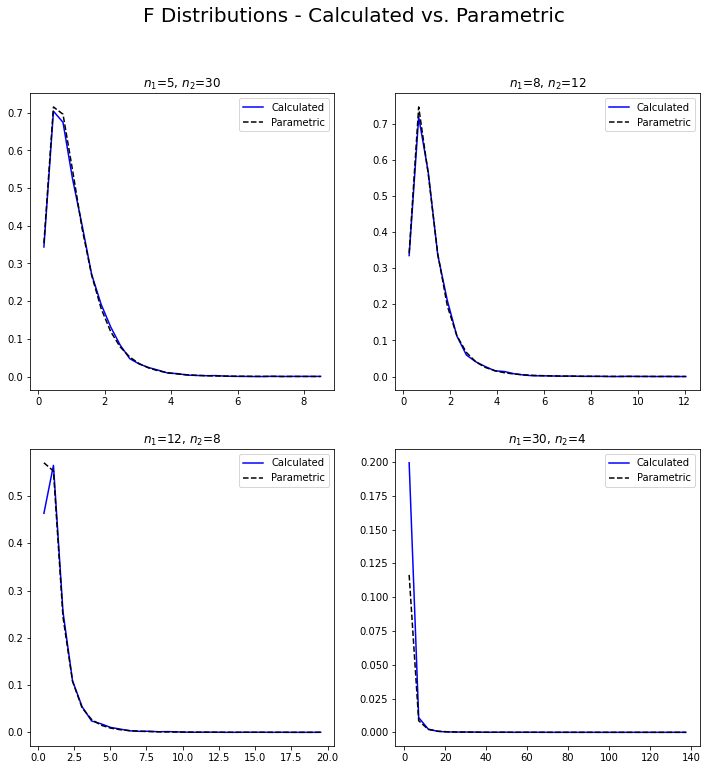

In [21]:
n1 = [5,8,12,30]
n2 = [30,12,8,4]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,12))
for i in range(2):
    for j in range(2):
        plot_F_dist(n1[i*2+j],n2[i*2+j],ax= ax[i][j],num=10000)
        ax[i][j].set_title(f"$n_1$={n1[i*2+j]}, $n_2$={n2[i*2+j]}")
plt.suptitle("F Distributions - Calculated vs. Parametric",fontsize =20)
plt.show()

### b) Comparing sample variances from distributions with different means

In [22]:
def f_stat_calc(m1,s1,n1,m2,s2,n2):
    z1 = np.random.normal(m1,s1,n1)
    z2 = np.random.normal(m2,s2,n2)
    
    v1 = np.var(z1,ddof=1)
    v2 = np.var(z2,ddof=2)
    
    return (v1/(n1-1))/(v2/(n2-1))

In [23]:
def f_stat_comp_plot(params_1,params_2,ax=None):
    m1,s1,n1 = params_1
    m2,s2,n2 = params_2
    f_stat = f_stat_calc(m1,s1,n1,m2,s2,n2)
    if ax==None:
        plt.figure(figsize=(12,5))
        ax = plt.gca()
    x = np.linspace(0,3,101)
    y = st.f.pdf(x,n1-1,n2-1)
    ax.plot(x,y,label = "F Distribution",color="b")
    #ax.axvline(f_stat,ymax=st.f.pdf(f_stat,n1-1,n2-1)/(np.max(y)+0.05),ymin=0.05,alpha=0.8,color="r",ls="--")
    ax.fill_between(x,0,y,where=x>=f_stat,alpha=0.2,color="b")
    ax.set_title(f"F-stat for distributions with params {params_1} and {params_2}",wrap=True)
    ax.text(0.5,0.65,f"F-stat : {np.round(f_stat,3)}",fontsize=12,transform=ax.transAxes)
    ax.text(0.5,0.5,f"P-value : {np.round(1-st.f.cdf(f_stat,n1-1,n2-1),3)}",fontsize=12,transform=ax.transAxes)
    return ax

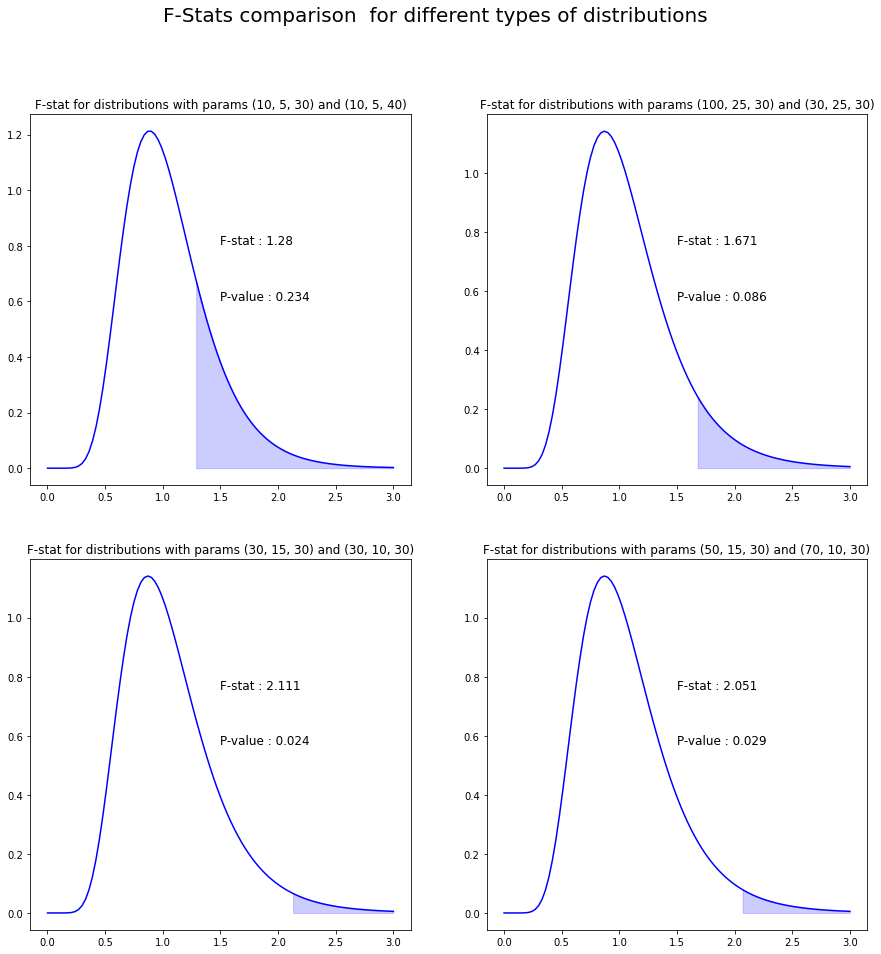

In [25]:
params_1 = [(10,5,30),(10,5,40)] # Same Distribution
params_2 = [(100,25,30),(30,25,30)] # Different Mean same Variance
params_3 = [(30,15,30),(30,10,30)] # Same Mean Different Variance
params_4 = [(50,15,30),(70,10,30)] # Different Distribution
params = [params_1,params_2,params_3,params_4]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
for i in range(2):
    for j in range(2):
        f_stat_comp_plot(params[i*2+j][0],params[i*2+j][1],ax=ax[i][j])
plt.suptitle("F-Stats comparison  for different types of distributions", fontsize=20)
plt.show()